In [ ]:
#import library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
items = pd.read_csv("https://raw.githubusercontent.com/Yabeh/Data-Mining/main/items.csv", delimiter='|')
items

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"
...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ]
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[]
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[]
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]"


In [ ]:
transactions = pd.read_csv("https://raw.githubusercontent.com/Yabeh/Data-Mining/main/transactions.csv", delimiter='|')
transactions

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0
...,...,...,...,...,...
365138,279351,70183,1,0,0
365139,279352,39716,1,0,0
365140,279353,35260,1,0,0
365141,279353,18805,4,0,0


In [ ]:
evaluation = pd.read_csv("https://raw.githubusercontent.com/Yabeh/Data-Mining/main/evaluation.csv")
evaluation

,itemID
0,12
1,45274
2,10104
3,41371
4,14015
...,...
995,78384
996,68157
997,44964
998,12971


In [ ]:
click = transactions.groupby('itemID')['click'].sum().reset_index()
click_count = transactions.groupby('itemID')['click'].count().reset_index()
click_count.columns = ['itemID', 'click_count']

In [ ]:
basket = transactions.groupby('itemID')['basket'].sum().reset_index()
basket_count = transactions.groupby('itemID')['basket'].count().reset_index()
basket_count.columns = ['itemID', 'basket_count']

In [ ]:
orders = transactions.groupby('itemID')['order'].sum().reset_index()
orders_count = transactions.groupby('itemID')['order'].count().reset_index()
orders_count.columns = ['itemID', 'orders_count']

In [ ]:
items_transactions = pd.DataFrame(items['itemID'])

items_transactions = pd.merge(items_transactions, click, how = 'left', on = 'itemID')
items_transactions = pd.merge(items_transactions, click_count, how = 'left', on = 'itemID')

items_transactions = pd.merge(items_transactions, basket, how = 'left', on = 'itemID')
items_transactions = pd.merge(items_transactions, basket_count, how = 'left', on = 'itemID')

items_transactions = pd.merge(items_transactions, orders, how = 'left', on = 'itemID')
items_transactions = pd.merge(items_transactions, orders_count, how = 'left', on = 'itemID')

items_transactions

,itemID,click,click_count,basket,basket_count,order,orders_count
0,21310,3.0,3.0,0.0,3.0,0.0,3.0
1,73018,75.0,59.0,5.0,59.0,1.0,59.0
2,19194,217.0,186.0,13.0,186.0,1.0,186.0
3,40250,352.0,339.0,6.0,339.0,0.0,339.0
4,46107,47.0,25.0,3.0,25.0,1.0,25.0
...,...,...,...,...,...,...,...
77820,37678,NaN,NaN,NaN,NaN,NaN,NaN
77821,68688,NaN,NaN,NaN,NaN,NaN,NaN
77822,57291,NaN,NaN,NaN,NaN,NaN,NaN
77823,78130,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration



In [ ]:
items.describe()

,itemID
count,78030.000000
mean,39545.062553
std,22825.650252
min,0.000000
25%,19775.250000
50%,39561.500000
75%,59306.750000
max,79067.000000


In [ ]:
transactions.describe()

,sessionID,itemID,click,basket,order
count,365143.000000,365143.000000,365143.000000,365143.000000,365143.000000
mean,139586.939175,40051.292307,1.233180,0.141202,0.048403
std,80795.207871,22493.347334,1.069996,1.107574,0.268717
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69459.500000,20713.000000,1.000000,0.000000,0.000000
50%,139608.000000,40692.000000,1.000000,0.000000,0.000000
75%,209750.500000,58916.000000,1.000000,0.000000,0.000000
max,279354.000000,79066.000000,118.000000,293.000000,28.000000


In [ ]:
evaluation.describe()

,itemID
count,1000.000000
mean,38961.238000
std,22748.274304
min,12.000000
25%,18654.250000
50%,39403.500000
75%,58747.500000
max,79016.000000


## Check Missing Values

In [ ]:
items.isnull().sum()

itemID           0
title            0
author        3240
publisher        9
main topic     258
subtopics        1
dtype: int64

In [ ]:
items = items.dropna()
items.isnull().sum()

itemID        0
title         0
author        0
publisher     0
main topic    0
subtopics     0
dtype: int64

In [ ]:
transactions.isnull().sum()

sessionID    0
itemID       0
click        0
basket       0
order        0
dtype: int64

In [ ]:
evaluation.isnull().sum()

itemID    0
dtype: int64

In [ ]:
items_transactions.isnull().sum()

itemID              0
click           53121
click_count     53121
basket          53121
basket_count    53121
order           53121
orders_count    53121
dtype: int64

In [ ]:
items_transactions = items_transactions.dropna()
items_transactions.isnull().sum()

itemID          0
click           0
click_count     0
basket          0
basket_count    0
order           0
orders_count    0
dtype: int64

In [ ]:
items_transactions

,itemID,click,click_count,basket,basket_count,order,orders_count
0,21310,3.0,3.0,0.0,3.0,0.0,3.0
1,73018,75.0,59.0,5.0,59.0,1.0,59.0
2,19194,217.0,186.0,13.0,186.0,1.0,186.0
3,40250,352.0,339.0,6.0,339.0,0.0,339.0
4,46107,47.0,25.0,3.0,25.0,1.0,25.0
...,...,...,...,...,...,...,...
24904,21264,1.0,1.0,0.0,1.0,0.0,1.0
24905,22297,1.0,1.0,0.0,1.0,0.0,1.0
24906,56041,1.0,1.0,0.0,1.0,0.0,1.0
24907,67832,2.0,1.0,0.0,1.0,0.0,1.0


##Check Data Types

In [ ]:
items_transactions

,itemID,click,click_count,basket,basket_count,order,orders_count
0,21310,3.0,3.0,0.0,3.0,0.0,3.0
1,73018,75.0,59.0,5.0,59.0,1.0,59.0
2,19194,217.0,186.0,13.0,186.0,1.0,186.0
3,40250,352.0,339.0,6.0,339.0,0.0,339.0
4,46107,47.0,25.0,3.0,25.0,1.0,25.0
...,...,...,...,...,...,...,...
24904,21264,1.0,1.0,0.0,1.0,0.0,1.0
24905,22297,1.0,1.0,0.0,1.0,0.0,1.0
24906,56041,1.0,1.0,0.0,1.0,0.0,1.0
24907,67832,2.0,1.0,0.0,1.0,0.0,1.0


##Check Data Distribution

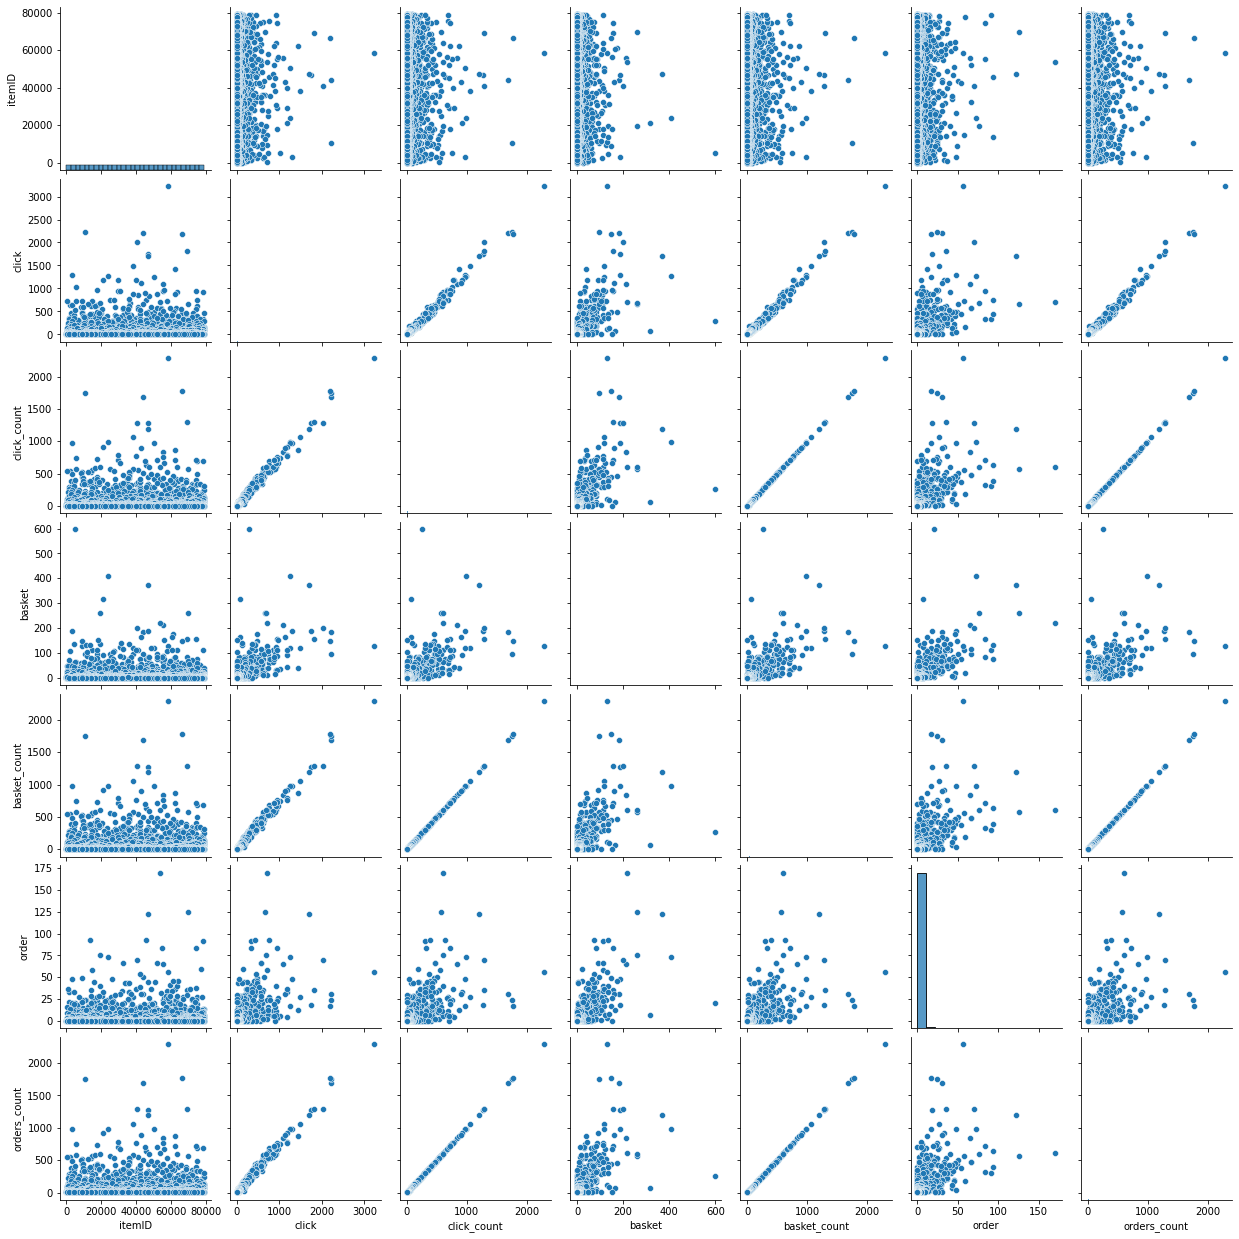

In [ ]:
sns.pairplot(data=items_transactions,kind='scatter')

##Check Outliers

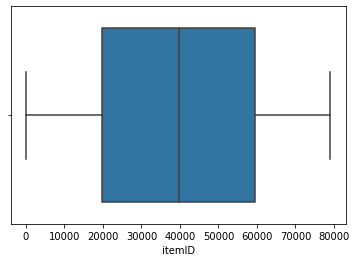

In [ ]:
ax = sns.boxplot(x=items_transactions['itemID'])

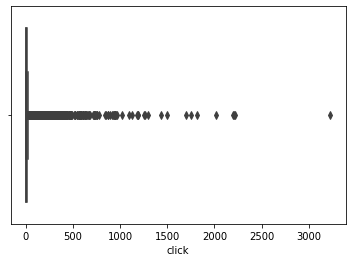

In [ ]:
ax = sns.boxplot(x=items_transactions['click'])

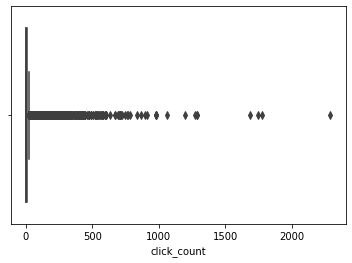

In [ ]:
ax = sns.boxplot(x=items_transactions['click_count'])

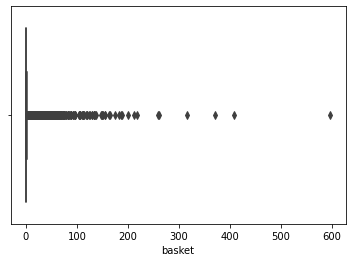

In [ ]:
ax = sns.boxplot(x=items_transactions['basket'])

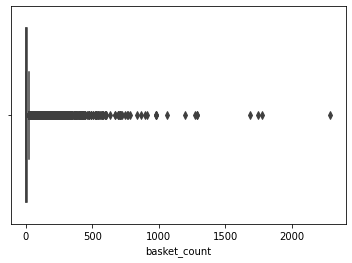

In [ ]:
ax = sns.boxplot(x=items_transactions['basket_count'])

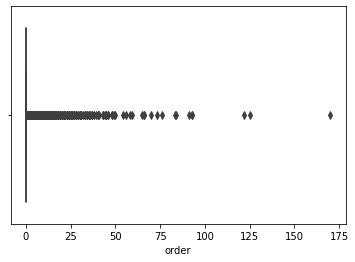

In [ ]:
ax = sns.boxplot(x=items_transactions['order'])

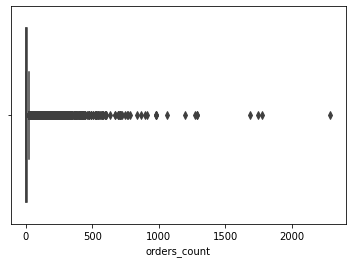

In [ ]:
ax = sns.boxplot(x=items_transactions['orders_count'])

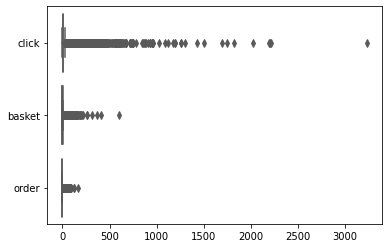

In [ ]:
ax = sns.boxplot(data=items_transactions[['click', 'basket', 'order']], orient="h", palette="Set2")

In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(items_transactions, "orders_count")
print(probable_outliers_tm)

[1, 2, 3, 5, 10, 16, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 45, 46, 50, 52, 59, 63, 65, 66, 70, 71, 72, 73, 75, 76, 79, 80, 81, 85, 86, 87, 89, 90, 91, 92, 95, 96, 98, 100, 101, 102, 103, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 133, 138, 139, 140, 141, 142, 147, 148, 149, 150, 157, 158, 159, 161, 162, 163, 164, 167, 169, 172, 173, 177, 178, 179, 180, 186, 187, 188, 189, 190, 191, 199, 200, 201, 202, 203, 204, 205, 211, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 264, 265, 267, 269, 271, 274, 275, 276, 278, 279, 280, 281, 282, 283, 288, 289, 290, 294, 295, 296, 297, 298, 299, 303, 304, 305, 306, 308, 311, 313, 315, 316, 318, 322, 323, 324, 325, 327, 329, 330, 332, 333, 334, 335, 336, 338, 340, 343, 344, 345, 347, 348, 349, 350, 352

#Language Variable Engineering

##Creating Language

In [ ]:
items = pd.read_csv('https://raw.githubusercontent.com/Yabeh/Data-Mining/main/items.csv', sep = '|')

In [ ]:
## Here, we are removing the observations that language identifying softwares cannot handle, 
## such as titles that are only numbers and titles that are too short. We can manually input 
## these observations back in later with their languages

items = items.drop(124)
items = items.drop(582)

## Title: 1984
items = items.drop(736)

## Title: 1984
items = items.drop(3660)

## Title: 381
items = items.drop(1282)

## Title: 2034
items = items.drop(3871)

## Title: 2021
items = items.drop(6224)

## Title: 2037
items = items.drop(7458)

## Title: 43
items = items.drop(10749)

## Title: 2069
items = items.drop(10944)

## Title: 2121
items = items.drop(13490)

## Title: 2394
items = items.drop(13888)

## Title: 2121
items = items.drop(15060)

## Title: 2048
items = items.drop(15940)

## Title: 17
items = items.drop(15555)

## Title: 2121
items = items.drop(17732)

## Title: 1632
items = items.drop(21448)

## Title: Ferris@Bruns_LLC
items = items.drop(21929)

## Title: 1814
items = items.drop(23431)

## Title: 2012
items = items.drop(25479)

## Title: 11
items = items.drop(25567)

## Title: !!
items = items.drop(31055)

## Title: Tajo@Bruns_LLC
items = items.drop(32694)

## Title: 1,2,3
items = items.drop(35645)

## Title: 110
items = items.drop(39581)

## Title: 5:55
items = items.drop(40733)

## Title: 1906
items = items.drop(41657)

## Title: 1906
items = items.drop(41664)

## Title: 2030
items = items.drop(43450)

## Title: 2047
items = items.drop(43766)

## Title: 2049
items = items.drop(77770)

## Title: 444
items = items.drop(44841)

## Title: 444
items = items.drop(44842)

## Title: 2501
items = items.drop(48254)

## Title: 2060
items = items.drop(48905)

## Title: 5028
items = items.drop(50669)

## Title: 2084
items = items.drop(55060)

## Title: 2053
items = items.drop(55370)

## Title: 1520-1522
items = items.drop(55539)

## Title: 2145
items = items.drop(61473)

## Title: 1523-1526
items = items.drop(64005)

## Title: 1712
items = items.drop(64441)

## Title: 2084
items = items.drop(64706)

## Title: 2625
items = items.drop(65362)

## Title: 2084
items = items.drop(66980)

## Title: >
items = items.drop(67092)

## Title: 2156
items = items.drop(67283)

## Title: 6984
items = items.drop(67286)

## Title: 12
items = items.drop(69842)

## Title: 71%
items = items.drop(72536)

## Title: 4
items = items.drop(73961)

## Title:  Io
items = items.drop( 136 )
## Title:  Ava
items = items.drop( 831 )
## Title:  ABC
items = items.drop( 3677 )
## Title:  EMP
items = items.drop( 4022 )
## Title:  Hex
items = items.drop( 4465 )
## Title:  Wir
items = items.drop( 4814 )
## Title:  Boy
items = items.drop( 5054 )
## Title:  Oma
items = items.drop( 5156 )
## Title:  Nik
items = items.drop( 5698 )
## Title:  Kim
items = items.drop( 6260 )
## Title:  Pet
items = items.drop( 6407 )
## Title:  M
items = items.drop( 6999 )
## Title:  Äon
items = items.drop( 7000 )
## Title:  Ava
items = items.drop( 7509 )
## Title:  XX
items = items.drop( 7963 )
## Title:  Wir
items = items.drop( 7999 )
## Title:  Dry
items = items.drop( 8895 )
## Title:  Ash
items = items.drop( 8896 )
## Title:  FOX
items = items.drop( 11149 )
## Title:  Cut
items = items.drop( 12669 )
## Title:  ID
items = items.drop( 12974 )
## Title:  Ehi
items = items.drop( 12987 )
## Title:  ICE
items = items.drop( 13010 )
## Title:  We
items = items.drop( 13142 )
## Title:  Wir
items = items.drop( 13234 )
## Title:  Pax
items = items.drop( 13532 )
## Title:  Eve
items = items.drop( 13748 )
## Title:  Ye
items = items.drop( 15053 )
## Title:  Ral
items = items.drop( 15379 )
## Title:  Ten
items = items.drop( 15749 )
## Title:  BEX
items = items.drop( 17253 )
## Title:  Äon
items = items.drop( 18532 )
## Title:  Yo
items = items.drop( 18912 )
## Title:  ZPG
items = items.drop( 19360 )
## Title:  Liv
items = items.drop( 19716 )
## Title:  Q
items = items.drop( 19982 )
## Title:  Dig
items = items.drop( 20544 )
## Title:  Tin
items = items.drop( 20751 )
## Title:  Sea
items = items.drop( 21159 )
## Title:  SHE
items = items.drop( 22397 )
## Title:  Run
items = items.drop( 22675 )
## Title:  Noa
items = items.drop( 22696 )
## Title:  Vet
items = items.drop( 22798 )
## Title:  NDI
items = items.drop( 23453 )
## Title:  Mud
items = items.drop( 23766 )
## Title:  COR
items = items.drop( 24594 )
## Title:  Hb
items = items.drop( 25835 )
## Title:  Fee
items = items.drop( 25957 )
## Title:  Tao
items = items.drop( 26453 )
## Title:  Lie
items = items.drop( 26609 )
## Title:  KY
items = items.drop( 26723 )
## Title:  Sol
items = items.drop( 27164 )
## Title:  Eve
items = items.drop( 27296 )
## Title:  If
items = items.drop( 28475 )
## Title:  Ink
items = items.drop( 29260 )
## Title:  L
items = items.drop( 29902 )
## Title:  Zoe
items = items.drop( 30029 )
## Title:  Tex
items = items.drop( 30314 )
## Title:  Red
items = items.drop( 31667 )
## Title:  MAY
items = items.drop( 32187 )
## Title:  Aim
items = items.drop( 32830 )
## Title:  Son
items = items.drop( 33415 )
## Title:  L
items = items.drop( 33504 )
## Title:  Nil
items = items.drop( 33672 )
## Title:  Sie
items = items.drop( 34131 )
## Title:  Eva
items = items.drop( 34908 )
## Title:  Zel
items = items.drop( 35241 )
## Title:  Web
items = items.drop( 35451 )
## Title:  Hit
items = items.drop( 36713 )
## Title:  One
items = items.drop( 36886 )
## Title:  Mia
items = items.drop( 37465 )
## Title:  Sun
items = items.drop( 37739 )
## Title:  One
items = items.drop( 38315 )
## Title:  Up
items = items.drop( 38619 )
## Title:  Liv
items = items.drop( 38885 )
## Title:  Max
items = items.drop( 39320 )
## Title:  Run
items = items.drop( 39328 )
## Title:  Spy
items = items.drop( 39776 )
## Title:  Jim
items = items.drop( 40474 )
## Title:  A
items = items.drop( 41040 )
## Title:  Fir
items = items.drop( 41156 )
## Title:  GEN
items = items.drop( 41759 )
## Title:  Quo
items = items.drop( 41762 )
## Title:  Sky
items = items.drop( 42360 )
## Title:  Meh
items = items.drop( 42427 )
## Title:  Eco
items = items.drop( 42706 )
## Title:  Pug
items = items.drop( 43203 )
## Title:  A
items = items.drop( 43324 )
## Title:  May
items = items.drop( 45723 )
## Title:  I
items = items.drop( 46217 )
## Title:  Sue
items = items.drop( 46444 )
## Title:  Er?
items = items.drop( 46586 )
## Title:  Sin
items = items.drop( 47139 )
## Title:  Sam
items = items.drop( 47752 )
## Title:  Ohm
items = items.drop( 48500 )
## Title:  Bob
items = items.drop( 49109 )
## Title:  Aim
items = items.drop( 49184 )
## Title:  Few
items = items.drop( 49591 )
## Title:  A M
items = items.drop( 49704 )
## Title:  War
items = items.drop( 50112 )
## Title:  Z
items = items.drop( 50130 )
## Title:  Kim
items = items.drop( 51251 )
## Title:  Kim
items = items.drop( 52784 )
## Title:  ANK
items = items.drop( 52943 )
## Title:  ADA
items = items.drop( 53145 )
## Title:  Ink
items = items.drop( 54822 )
## Title:  KAT
items = items.drop( 55063 )
## Title:  The
items = items.drop( 55499 )
## Title:  ANA
items = items.drop( 55570 )
## Title:  PC
items = items.drop( 57219 )
## Title:  Ray
items = items.drop( 59436 )
## Title:  Nyx
items = items.drop( 59743 )
## Title:  Ka
items = items.drop( 59756 )
## Title:  Reg
items = items.drop( 60311 )
## Title:  Hex
items = items.drop( 60620 )
## Title:  ABC
items = items.drop( 60681 )
## Title:  TEA
items = items.drop( 61456 )
## Title:  Wi
items = items.drop( 61998 )
## Title:  Red
items = items.drop( 62262 )
## Title:  Jo
items = items.drop( 62777 )
## Title:  Tok
items = items.drop( 63018 )
## Title:  Ug
items = items.drop( 64328 )
## Title:  Vic
items = items.drop( 64507 )
## Title:  FOX
items = items.drop( 64785 )
## Title:  ISO
items = items.drop( 64919 )
## Title:  Lu
items = items.drop( 65886 )
## Title:  Fey
items = items.drop( 67625 )
## Title:  Fey
items = items.drop( 67628 )
## Title:  HPI
items = items.drop( 67743 )
## Title:  Air
items = items.drop( 68029 )
## Title:  Red
items = items.drop( 68476 )
## Title:  Mer
items = items.drop( 68490 )
## Title:  Zoo
items = items.drop( 68936 )
## Title:  Bee
items = items.drop( 69689 )
## Title:  PUP
items = items.drop( 70156 )
## Title:  Été
items = items.drop( 71858 )
## Title:  Jòn
items = items.drop( 71865 )
## Title:  Ble
items = items.drop( 71876 )
## Title:  Ete
items = items.drop( 71920 )
## Title:  Vèt
items = items.drop( 71933 )
## Title:  Buk
items = items.drop( 72131 )
## Title:  Kam
items = items.drop( 72461 )
## Title:  TBC
items = items.drop( 72583 )
## Title:  ERA
items = items.drop( 72846 )
## Title:  H2O
items = items.drop( 72850 )
## Title:  Kid
items = items.drop( 72901 )
## Title:  No!
items = items.drop( 73228 )
## Title:  VTT
items = items.drop( 73954 )
## Title:  Fix
items = items.drop( 74360 )
## Title:  Bec
items = items.drop( 74598 )
## Title:  Zoo
items = items.drop( 75554 )
## Title:  WTF
items = items.drop( 77324 )
## Title:  Kim
items = items.drop( 77674 )
## Title:  Now
items = items.drop( 77983 )



In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3e3f194fcaa2324bd3b8e0d4a8e310b70c2ceb793b0e570d39c880fb08bb3ad2
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
## Using: langdetect

from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

items['language'] = ''

myList = items['title']
languages = []

for text in myList:
    languages.append(detect(text))
    ##print(text)

items['language'] = languages

In [ ]:
items['language']

0        en
1        de
2        en
3        de
4        de
         ..
78025    en
78026    de
78027    en
78028    en
78029    en
Name: language, Length: 77825, dtype: object

In [ ]:
items['language']

items = items.drop(columns = ['language_textblob'])

################################
## Exporting the new data set ##
################################

items.to_csv('items_1.csv', index = False, header = True)

##Variable Engineering and Merging Datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Yabeh/Data-Mining/main/items_1.csv', sep = ',')
df

,itemID,title,author,publisher,main topic,subtopics,language
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de
...,...,...,...,...,...,...,...
77820,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],en
77821,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],de
77822,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],en
77823,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",en


In [ ]:
## General topic 1 (first character of main topic) and general topic 2 (first two characters of main topic)

df['general_topic'] = df['main topic'].astype(str).str[0]
df['general_topic_2'] = df['main topic'].astype(str).str[0:2]
df['general_topic_3'] = df['main topic'].astype(str).str[0:3]

In [ ]:
## Looking at first character of main topic

## Categorical variable for each topic on the "Thema Subject Categories 1.4" chart

df['arts'] = np.where(df['general_topic'] == 'A', 1, 0)
df['language_linguistics'] = np.where(df['general_topic'] == 'C', 1, 0)

df['literature'] = np.where(df['general_topic'] == 'D', 1, 0)
df['poetry'] = np.where(df['general_topic_2'] == 'DC', 1, 0)

df['fiction'] = np.where(df['general_topic'] == 'F', 1, 0)
df['science_fiction'] = np.where(df['general_topic_2'] == 'FL', 1, 0)
df['fiction_fantasy'] = np.where(df['general_topic_2'] == 'FM', 1, 0)

df['reference'] = np.where(df['general_topic'] == 'G', 1, 0)

df['social_sciences'] = np.where(df['general_topic'] == 'J', 1, 0)
df['education'] = np.where(df['general_topic_2'] == 'JN', 1, 0)
df['politics_government'] = np.where(df['general_topic_2'] == 'JP', 1, 0)
df['warfare'] = np.where(df['general_topic_2'] == 'JW', 1, 0)

df['business'] = np.where(df['general_topic'] == 'K', 1, 0)
df['law'] = np.where(df['general_topic'] == 'L', 1, 0)
df['medicine'] = np.where(df['general_topic'] == 'M', 1, 0)
df['history'] = np.where(df['general_topic'] == 'N', 1, 0)

df['math_sciences'] = np.where(df['general_topic'] == 'P', 1, 0)
df['math'] = np.where(df['general_topic_2'] == 'PB', 1, 0)
df['astronomy'] = np.where(df['general_topic_2'] == 'PG', 1, 0)
df['physics'] = np.where(df['general_topic_2'] == 'PH', 1, 0)
df['chemistry'] = np.where(df['general_topic_2'] == 'PN', 1, 0)
df['biology'] = np.where(df['general_topic_2'] == 'PS', 1, 0)

df['philosophy_religion'] = np.where(df['general_topic'] == 'Q', 1, 0)
df['philosophy'] = np.where(df['general_topic_2'] == 'QD', 1, 0)
df['religion'] = np.where(df['general_topic_2'] == 'QR', 1, 0)

df['earth_sciences'] = np.where(df['general_topic'] == 'R', 1, 0)
df['geography'] = np.where(df['general_topic_2'] == 'RG', 1, 0)

df['sports'] = np.where(df['general_topic'] == 'S', 1, 0)
df['general_sports'] = np.where(df['general_topic_2'] == 'SC', 1, 0)
df['ball_sports'] = np.where(df['general_topic_2'] == 'SF', 1, 0)
df['athletics_gynastics'] = np.where(df['general_topic_2'] == 'SH', 1, 0)
df['equestrian'] = np.where(df['general_topic_2'] == 'SK', 1, 0)
df['vehicle_sports'] = np.where(df['general_topic_2'] == 'SM', 1, 0)
df['water_sports'] = np.where(df['general_topic_2'] == 'SP', 1, 0)
df['combat_sports'] = np.where(df['general_topic_2'] == 'SR', 1, 0)
df['field_sports'] = np.where(df['general_topic_2'] == 'SV', 1, 0)
df['outdoors'] = np.where(df['general_topic_2'] == 'SZ', 1, 0)

df['technology'] = np.where(df['general_topic'] == 'T', 1, 0)
df['agriculture'] = np.where(df['general_topic_2'] == 'TV', 1, 0)

df['computing'] = np.where(df['general_topic'] == 'U', 1, 0)

df['health'] = np.where(df['general_topic'] == 'V', 1, 0)
df['family_health'] = np.where(df['general_topic_2'] == 'VF', 1, 0)
df['self_help'] = np.where(df['general_topic_2'] == 'VS', 1, 0)
df['mind_body_spirit'] = np.where(df['general_topic_2'] == 'VX', 1, 0)

df['lifestyle_hobbies'] = np.where(df['general_topic'] == 'W', 1, 0)
df['cooking'] = np.where(df['general_topic_2'] == 'WB', 1, 0)
df['antiques'] = np.where(df['general_topic_2'] == 'WC', 1, 0)
df['quizzes_games'] = np.where(df['general_topic_2'] == 'WD', 1, 0)
df['crafts'] = np.where(df['general_topic_2'] == 'WF', 1, 0)
df['humour'] = np.where(df['general_topic_2'] == 'WH', 1, 0)
df['personal_style'] = np.where(df['general_topic_2'] == 'WJ', 1, 0)
df['home'] = np.where(df['general_topic_2'] == 'WK', 1, 0)
df['gardening'] = np.where(df['general_topic_2'] == 'WM', 1, 0)
df['nature'] = np.where(df['general_topic_2'] == 'WN', 1, 0)
df['travel_holiday'] = np.where(df['general_topic_2'] == 'WT', 1, 0)
df['stationary'] = np.where(df['general_topic_2'] == 'WZ', 1, 0)

df['graphic_novels'] = np.where(df['general_topic'] == 'X', 1, 0)
df['cartoons'] = np.where(df['general_topic_2'] == 'XY', 1, 0)

df['childrens'] = np.where(df['general_topic'] == 'Y', 1, 0)
df['childrens_young'] = np.where(df['general_topic_2'] == 'YB', 1, 0)
df['childrens_fiction'] = np.where(df['general_topic_2'] == 'YF', 1, 0)
df['childrens_educational'] = np.where(df['general_topic_2'] == 'YP', 1, 0)



In [ ]:
## Categorical variables to go along with language
## for the top six languages in the data set

df['english'] = np.where(df['language'] == 'en', 1, 0)
df['german'] = np.where(df['language'] == 'de', 1, 0)
df['spanish'] = np.where(df['language'] == 'es', 1, 0)
df['italian'] = np.where(df['language'] == 'it', 1, 0)
df['french'] = np.where(df['language'] == 'fr', 1, 0)
df['portuguese'] = np.where(df['language'] == 'pt', 1, 0)

df['other_language'] = np.where(~np.isin(df['language'], ['en', 'de', 'es', 'it', 'fr', 'pt']), 1, 0)

In [ ]:
## Categorical variables to go along with author
## for the top 50 authors in the data set

df['GarciaSantiago']=np.where(df['author']=='Garcia Santiago',1,0)
df['ShelleyAdmont,KidkiddosBooks']=np.where(df['author']=='Shelley Admont, Kidkiddos Books',1,0)
df['JamesManning']=np.where(df['author']=='James Manning',1,0)
df['JulesVerne']=np.where(df['author']=='Jules Verne',1,0)
df['IdriesShah']=np.where(df['author']=='Idries Shah',1,0)
df['ErinHunter']=np.where(df['author']=='Erin Hunter',1,0)
df['EnidBlyton']=np.where(df['author']=='Enid Blyton',1,0)
df['R.L.Stine']=np.where(df['author']=='R. L. Stine',1,0)
df['TerryPratchett']=np.where(df['author']=='Terry Pratchett',1,0)
df['SpeedyPublishingLlc']=np.where(df['author']=='Speedy Publishing Llc',1,0)
df['H.G.Wells']=np.where(df['author']=='H. G. Wells',1,0)
df['RogerHargreaves']=np.where(df['author']=='Roger Hargreaves',1,0)
df['SteveHerman']=np.where(df['author']=='Steve Herman',1,0)
df['TuulaPere']=np.where(df['author']=='Tuula Pere',1,0)
df['DaisyMeadows']=np.where(df['author']=='Daisy Meadows',1,0)
df['ElBlokehead']=np.where(df['author']=='El Blokehead',1,0)
df['RoaldDahl']=np.where(df['author']=='Roald Dahl',1,0)
df['LewisCarroll']=np.where(df['author']=='Lewis Carroll',1,0)
df['AlfredBekker']=np.where(df['author']=='Alfred Bekker',1,0)
df['PenelopeDyan']=np.where(df['author']=='Penelope Dyan',1,0)
df['FionaWatt']=np.where(df['author']=='Fiona Watt',1,0)
df['MichelleM.Pillow']=np.where(df['author']=='Michelle M. Pillow',1,0)
df['L.FrankBaum']=np.where(df['author']=='L. Frank Baum',1,0)
df['MatildeCorreia']=np.where(df['author']=='Matilde Correia',1,0)
df['GinoBianchi']=np.where(df['author']=='Gino Bianchi',1,0)
df['NorbertPautner']=np.where(df['author']=='Norbert Pautner',1,0)
df['BrandonSanderson']=np.where(df['author']=='Brandon Sanderson',1,0)
df['CaroleMarsh']=np.where(df['author']=='Carole Marsh',1,0)
df['CarolynKeene']=np.where(df['author']=='Carolyn Keene',1,0)
df['MichaelMorpurgo']=np.where(df['author']=='Michael Morpurgo',1,0)
df['JenniferL.Armentrout']=np.where(df['author']=='Jennifer L. Armentrout',1,0)
df['DanGutman']=np.where(df['author']=='Dan Gutman',1,0)
df['RickRiordan']=np.where(df['author']=='Rick Riordan',1,0)
df['L.M.Montgomery']=np.where(df['author']=='L. M. Montgomery',1,0)
df['Thithiajobs']=np.where(df['author']=='Thithiajobs',1,0)
df['PeterHertzberg']=np.where(df['author']=='Peter Hertzberg',1,0)
df['JacquelineWilson']=np.where(df['author']=='Jacqueline Wilson',1,0)
df['GraceGoodwin']=np.where(df['author']=='Grace Goodwin',1,0)
df['CassandraClare']=np.where(df['author']=='Cassandra Clare',1,0)
df['LouisaMayAlcott']=np.where(df['author']=='Louisa May Alcott',1,0)
df['JeffKinney']=np.where(df['author']=='Jeff Kinney',1,0)
df['J.R.R.Tolkien']=np.where(df['author']=='J. R. R. Tolkien',1,0)
df['MaryPopeOsborne']=np.where(df['author']=='Mary Pope Osborne',1,0)
df['Panini']=np.where(df['author']=='Panini',1,0)
df['J.R.Ward']=np.where(df['author']=='J. R. Ward',1,0)
df['GeorgeR.R.Martin']=np.where(df['author']=='George R. R. Martin',1,0)
df['SaraShepard']=np.where(df['author']=='Sara Shepard',1,0)
df['JakeMaddox']=np.where(df['author']=='Jake Maddox',1,0)
df['MarkusHeitz']=np.where(df['author']=='Markus Heitz',1,0)
df['LincolnPeirce']=np.where(df['author']=='Lincoln Peirce',1,0)

In [ ]:
df.to_csv('items_final_newer.csv', index = False, header = True)

In [ ]:
items = pd.read_csv('https://raw.githubusercontent.com/Yabeh/Data-Mining/main/items_final_newer.csv', sep = ',')
items

,itemID,title,author,publisher,main topic,subtopics,language,general_topic,general_topic_2,general_topic_3,arts,language_linguistics,literature,poetry,fiction,science_fiction,fiction_fantasy,reference,social_sciences,education,politics_government,warfare,business,law,medicine,history,math_sciences,math,astronomy,physics,chemistry,biology,philosophy_religion,philosophy,religion,earth_sciences,geography,sports,general_sports,ball_sports,...,H.G.Wells,RogerHargreaves,SteveHerman,TuulaPere,DaisyMeadows,ElBlokehead,RoaldDahl,LewisCarroll,AlfredBekker,PenelopeDyan,FionaWatt,MichelleM.Pillow,L.FrankBaum,MatildeCorreia,GinoBianchi,NorbertPautner,BrandonSanderson,CaroleMarsh,CarolynKeene,MichaelMorpurgo,JenniferL.Armentrout,DanGutman,RickRiordan,L.M.Montgomery,Thithiajobs,PeterHertzberg,JacquelineWilson,GraceGoodwin,CassandraClare,LouisaMayAlcott,JeffKinney,J.R.R.Tolkien,MaryPopeOsborne,Panini,J.R.Ward,GeorgeR.R.Martin,SaraShepard,JakeMaddox,MarkusHeitz,LincolnPeirce
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en,Y,YF,YFB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de,A,AG,AGZ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en,Y,YF,YFH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de,Y,YB,YB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de,W,WF,WFT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77820,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],en,Y,YF,YFA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77821,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],de,F,FM,FMB,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77822,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],en,Y,YF,YFU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77823,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",en,Y,YF,YFC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Outlier Analysis

In [ ]:
import scipy.linalg as la
from sklearn.preprocessing import MinMaxScaler


def distance_from_centroid_scores(data):
    
    """
    
    This function computes the outlier scores of the items that haves historical 
    transactions. We used the algorithm presented in page 78 of the Outlier 
    Analysis. Notice that these scores are computed using click, basket and order 
    counts.
    
    """
    
    ## Storing full-dataset
    full_data = data[['itemID', 'click_count', 'basket_count', 'order']]
    
    ## Selecting non-missing data 
    temp_data = data.dropna()
    temp_data = temp_data[['click_count', 'basket_count', 'order']]
    
    ## Standardizing the data
    scaler = MinMaxScaler().fit(temp_data)
    temp_data = scaler.transform(temp_data)

    ## Computing the covariance matrix
    sigma = np.cov(temp_data, rowvar = False)
    
    ## Computing eigenvalues and eigenvectos of the covariance matrix
    eigvals, eigvecs = la.eig(sigma)
    
    ## Defining D and P (for PCA outlier score algorithm form Outlier 
    ## Analysis book)
    D = temp_data
    P = eigvecs

    ## Computing D'
    D_prime = np.matmul(D, P)

    ## Standardizing (dividing each column by it standard deviation)
    for i in range(0, D_prime.shape[1]):
        
        D_prime[:, i] = D_prime[:, i] / D_prime[:, i].std(ddof = 1)
    
    ## Computing the centroid
    centroid = D_prime.mean(axis = 0)
    
    ## Declaring list to store Euclidean distances
    distances = []
    
    ## Finding the number of rows in data
    n = D_prime.shape[0]
    
    for i in range(0, n):
        
        ## Selecting the i-th row
        temp = D_prime[i, :]
        
        ## Computing the Euclidean distance
        distances.append(np.sqrt(np.sum((temp - centroid)**2)))
    
    ## Changing the outlier-scores to 1-5 scale
    scores = changing_scale(distances, low_bound = 1, up_bound = 5)
    
    ## Appending ratings to itemID that appear on transaction file
    temp_data = data.dropna()
    itemIDs = temp_data['itemID']
    temp_data = pd.DataFrame({'itemID': itemIDs})
    temp_data['rating'] = scores
    
    ## Appending ratings to the full-dataset
    data_out = pd.merge(full_data, temp_data, on = ['itemID'], how = 'left')
    data_out['rating'] = data_out['rating'].fillna(0)
    
    return data_out


def changing_scale(data, low_bound, up_bound):
    
    ## Finding the max and the min 
    max_val = max(data)
    min_val = min(data)
    
    ## Chaning the scale of data
    newdata = ((up_bound - low_bound) / (max_val - min_val))*(data - max_val) + up_bound
    
    return newdata

In [ ]:
item_ratings = distance_from_centroid_scores(items_transactions)

,itemID,click_count,basket_count,order,rating
0,21310,3.0,3.0,0.0,1.007254
1,73018,59.0,59.0,1.0,1.070607
2,19194,186.0,186.0,1.0,1.303478
3,40250,339.0,339.0,0.0,1.610912
4,46107,25.0,25.0,1.0,1.006702
...,...,...,...,...,...
77820,37678,NaN,NaN,NaN,0.000000
77821,68688,NaN,NaN,NaN,0.000000
77822,57291,NaN,NaN,NaN,0.000000
77823,78130,NaN,NaN,NaN,0.000000


#kNN Top5 Neighbors

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances


def top_5(book, items, items_ratings, similarity_measure):
    
    """
    
    This function extracts the top-five similar books for a given book and 
    similarity measure. This function takes the following arguments:
    
    book: the book for which five recommendations need to be provided
    
    items: data-frame that contains all the books with their corresponding engineered features.
    
    items_ratings: data-frame that contains the popularity score of itemIDs with 
    transactional history.
    
    similarity_measure: possible values Euclidean, Cosine or Manhattan
    
    """
    
    ## Filter out books with same title but different publisher
    temp = items[items['itemID'] == book]
    temp_title = items.loc[items['itemID'] == book, 'title']
    items = items[~np.isin(items['title'], temp_title)]
    items = pd.concat([temp, items]).reset_index(drop = True)
        
    ## Selecting books based on the same language and topic
    items = items[np.isin(items['language'], temp['language'])].reset_index(drop = True)
    
    if (items[np.isin(items['general_topic'], temp['general_topic'])].shape[0] > 5):        
        if (sum(items['general_topic'] == 'Y') > 15000):

            if (all(temp['general_topic_2'] == 'YF') == True):

                items = items[np.isin(items['general_topic_3'], temp['general_topic_3'])].reset_index(drop = True)

            else:
                
                if (items[np.isin(items['general_topic_2'], temp['general_topic_2'])].shape[0] >= 6):
                    
                    items = items[np.isin(items['general_topic_2'], temp['general_topic_2'])].reset_index(drop = True) 
                
                else:
                    
                    items = items[np.isin(items['general_topic'], temp['general_topic'])].reset_index(drop = True)
            
    ## Selecting variables of interest 
    to_remove = ['itemID', 'title', 'author', 'publisher', 'subtopics', 'general_topic', 'general_topic_2', 'general_topic_3', 'language', 'main topic']
    variables_of_interest = items.columns[~np.isin(items.columns, to_remove)]
    items_temp = items[variables_of_interest]
        
    ## Selecting top similar books
    if (similarity_measure == 'Euclidean'):
    
        D = euclidean_distances(items_temp)
        to_select = np.argsort(D[:, 0])[1:21]
        
    elif (similarity_measure == 'Cosine'):
        
        D = cosine_similarity(items_temp)
        to_select = np.argsort(-D[:, 0])[1:21]

    elif (similarity_measure == 'Manhattan'):
        
        D = manhattan_distances(items_temp)
        to_select = np.argsort(D[:, 0])[1:21]
    
    return items_and_ratings(to_select, items, items_ratings)


def top_5_after_transaction(book, book_to_recommend, items, items_ratings, similarity_measure):
    
    """
    
    This function extracts the top-five similar books for a given book, books from 
    transaction history, items, items popularity score, and a similarity measure. 
    This function takes the following arguments:
    
    book: the book for which five recommendations need to be provided
    
    book_to_recommend: list of book from historical transactions.
    
    items: data-frame that contains all the books with their corresponding engineered features.
    
    items_ratings: data-frame that contains the popularity score of itemIDs with 
    transactional history.
    
    similarity_measure: possible values Euclidean, Cosine or Manhattan
    
    """
    
    ## Selecting books based on transactions
    items_temp = items.loc[np.isin(items['itemID'], book_to_recommend)]
    
    ## Selecting books based on the same language and topic
    temp = items[items['itemID'] == book]
    temp_title = items.loc[items['itemID'] == book, 'title']
    
    items_temp = items_temp[~np.isin(items_temp['title'], temp_title)]
    items_temp = pd.concat([temp, items_temp]).reset_index(drop = True)
    
    ## Selecting books based on language
    items_temp = items_temp[np.isin(items_temp['language'], temp['language'])].reset_index(drop = True)
    
    ## Selecting variables of interest
    to_remove = ['itemID', 'title', 'author', 'publisher', 'subtopics', 'general_topic', 'general_topic_2', 'general_topic_3', 'language', 'main topic']
    variables_of_interest = items.columns[~np.isin(items.columns, to_remove)]
    items_temp_1 = items_temp[variables_of_interest]
    
    if (items_temp.shape[0] >= 20):
    
        ## Selecting top 20 similar books and their corresponding ratings
        if (similarity_measure == 'Euclidean'):
        
            D = euclidean_distances(items_temp_1)
            to_select = np.argsort(D[:, 0])[1:21]
            
        elif (similarity_measure == 'Cosine'):
            
            D = cosine_similarity(items_temp_1)
            to_select = np.argsort(-D[:, 0])[1:21]
            
        elif (similarity_measure == 'Manhattan'):
            
            D = manhattan_distances(items_temp_1)
            to_select = np.argsort(D[:, 0])[1:21]
        
        return items_and_ratings(to_select, items_temp, items_ratings)            

    else:

        knn_top_5 = top_5(book, items, items_ratings, similarity_measure)
        
        return knn_top_5
    

def items_and_ratings(to_select, items, ratings):
    
    items_and_ratings = items.loc[to_select, :].reset_index(drop = True)
    items_and_ratings = pd.merge(items_and_ratings, ratings, on = ['itemID'], how = 'left')
        
    items_and_ratings_sort = items_and_ratings.sort_values(by = ['rating'], ascending = False)
    items_and_ratings_sort = items_and_ratings_sort[items_and_ratings_sort['rating'] >= 1].reset_index(drop = True)
        
    if (items_and_ratings_sort.shape[0] >= 5):

        return [items_and_ratings_sort.loc[0, 'itemID'], items_and_ratings_sort.loc[1, 'itemID'], items_and_ratings_sort.loc[2, 'itemID'], items_and_ratings_sort.loc[3, 'itemID'], items_and_ratings_sort.loc[4, 'itemID']]
        
    elif (items_and_ratings_sort.shape[0] >= 1):

        temp_itemID_list = [itemID for itemID in items_and_ratings_sort['itemID']]
        n = len(temp_itemID_list)
        items_and_ratings = items_and_ratings[~np.isin(items_and_ratings['itemID'], temp_itemID_list)].reset_index(drop = True)
        
        to_append = items_and_ratings.loc[0:(4-n), 'itemID'].reset_index(drop = True).values.tolist()
            
        return temp_itemID_list + to_append
        
    else:

        return [items_and_ratings.loc[0, 'itemID'], items_and_ratings.loc[1, 'itemID'], items_and_ratings.loc[2, 'itemID'], items_and_ratings.loc[3, 'itemID'], items_and_ratings.loc[4, 'itemID']]

In [ ]:
item_ratings = item_ratings[['itemID', 'rating']]

In [ ]:
item_ratings.head(100)

,itemID,click_count,basket_count,order,rating
0,21310,3.0,3.0,0.0,1.007254
1,73018,59.0,59.0,1.0,1.070607
2,19194,186.0,186.0,1.0,1.303478
3,40250,339.0,339.0,0.0,1.610912
4,46107,25.0,25.0,1.0,1.006702
...,...,...,...,...,...
95,78643,302.0,302.0,91.0,3.150730
96,73628,91.0,91.0,0.0,1.144598
97,32594,29.0,29.0,3.0,1.039702
98,19070,135.0,135.0,18.0,1.350774


#Book Recommendations

In [ ]:
def Book_Recommendation(items, transactions, evaluation, items_ratings, similarity_measure):
    
    """
    
    This function is the main function that calls the other functions.
    It loops through all the items in the evaluation file and provides 
    the top-five recommendations. This function takes the following arguments:
    
    items: data-frame that contains all the books with their corresponding 
    engineered features.
    
    trasactions: data-frame that contains all the historical transactions.
    
    evaluation: data-frame that contains itemIDs for which we provide 
    recommendations.
    
    items_ratings: data-frame that contains the popularity score of itemIDs with 
    transactional history.
    
    similarity_measure: possible values Euclidean, Cosine or Manhattan
    
    """
    
    ## Creating new colums for recommendations
    evaluation['rec_1'] = np.nan
    evaluation['rec_2'] = np.nan
    evaluation['rec_3'] = np.nan
    evaluation['rec_4'] = np.nan
    evaluation['rec_5'] = np.nan
    
    ## Extracting number of books in evaluation 
    n = evaluation.shape[0]
    
    for i in range(0, n):
        print('Book ', i, '(',  evaluation.loc[i, 'itemID'], ')')
        recommedations = recommendation(evaluation.loc[i, 'itemID'], transactions, items, items_ratings, similarity_measure)
        evaluation.loc[i, 'rec_1'] = recommedations[0]
        evaluation.loc[i, 'rec_2'] = recommedations[1]
        evaluation.loc[i, 'rec_3'] = recommedations[2]
        evaluation.loc[i, 'rec_4'] = recommedations[3]
        evaluation.loc[i, 'rec_5'] = recommedations[4]
    
    evaluation['rec_1'] = evaluation['rec_1'].astype(int)
    evaluation['rec_2'] = evaluation['rec_2'].astype(int)
    evaluation['rec_3'] = evaluation['rec_3'].astype(int)
    evaluation['rec_4'] = evaluation['rec_4'].astype(int)
    evaluation['rec_5'] = evaluation['rec_5'].astype(int)

    return evaluation
        

def recommendation(book, transactions, items, items_ratings, similarity_measure): 
    
    ## Declaring list to append potential recommendations
    book_to_recommend = []
    
    if (np.isin(book, [37378, 47675])):
        
        book_to_recommend = [53695, 58522, 66247, 47120, 69803]
        
        return book_to_recommend
    
    else:
        
        ## Extracting recommendations based on orders
        sessionID_order = transactions[(transactions['itemID'] == book) & (transactions['order'] > 0)]['sessionID'].values
        order_to_append = transactions[np.isin(transactions['sessionID'], sessionID_order)]['itemID'].values
        order_to_append = order_to_append[~np.isin(order_to_append, [book])]
        book_to_recommend.extend(order_to_append)    

        ## Extracting recommendations based on basket
        sessionID_basket = transactions[(transactions['itemID'] == book) & (transactions['basket'] > 0)]['sessionID'].values
        basket_to_append = transactions[np.isin(transactions['sessionID'], sessionID_basket)]['itemID'].values
        basket_to_append = basket_to_append[~np.isin(basket_to_append, [book])]
        book_to_recommend.extend(basket_to_append)

        ## Extracting recommendations based on click
        sessionID_click = transactions[(transactions['itemID'] == book) & (transactions['click'] > 0)]['sessionID'].values    
        click_to_append = transactions[np.isin(transactions['sessionID'], sessionID_click)]['itemID'].values
        click_to_append = click_to_append[~np.isin(click_to_append, [book])]
        book_to_recommend.extend(click_to_append)

        ## Extracting recommendation based on the above list 
        to_append_next_layer = np.array(recommendation_help(book_to_recommend, transactions))
        to_append_next_layer = to_append_next_layer[~np.isin(to_append_next_layer, [book])]
        book_to_recommend.extend(to_append_next_layer)

        ## Running k-NN (5 nearest neighbors)
        book_to_recommend = top_5_after_transaction(book, book_to_recommend, items, items_ratings, similarity_measure)
        
        return book_to_recommend

        
def recommendation_help(books, transactions):
    
    ## Defining list to store results 
    results =  []
    
    ## Determining the number of items
    n = len(books)
    
    for i in range(0, n):
        
        results.extend(recommendation_help_help(books[i], transactions))
        
    return results    


def recommendation_help_help(book, transactions): 
    
    ## Declaring list to append potential recommendations
    book_to_recommend = []
    
    ## Extracting recommendations based on orders
    sessionID_order = transactions[(transactions['itemID'] == book) & (transactions['order'] > 0)]['sessionID'].values
    order_to_append = transactions[np.isin(transactions['sessionID'], sessionID_order)]['itemID'].values
    order_to_append = order_to_append[~np.isin(order_to_append, [book])]
    book_to_recommend.extend(order_to_append)    
        
    ## Extracting recommendations based on basket
    sessionID_basket = transactions[(transactions['itemID'] == book) & (transactions['basket'] > 0)]['sessionID'].values
    basket_to_append = transactions[np.isin(transactions['sessionID'], sessionID_basket)]['itemID'].values
    basket_to_append = basket_to_append[~np.isin(basket_to_append, [book])]
    book_to_recommend.extend(basket_to_append)
    
    ## Extracting recommendations based on click
    sessionID_click = transactions[(transactions['itemID'] == book) & (transactions['click'] > 0)]['sessionID'].values    
    click_to_append = transactions[np.isin(transactions['sessionID'], sessionID_click)]['itemID'].values
    click_to_append = click_to_append[~np.isin(click_to_append, [book])]
    book_to_recommend.extend(click_to_append)   
    
    return book_to_recommend

In [ ]:
similarity_measure = 'Euclidean'
recommendation_2 = Book_Recommendation(items, transactions, evaluation, item_ratings, similarity_measure)

Book  0 ( 12 )
Book  1 ( 45274 )
Book  2 ( 10104 )
Book  3 ( 41371 )
Book  4 ( 14015 )
Book  5 ( 28515 )
Book  6 ( 70766 )
Book  7 ( 1822 )
Book  8 ( 56794 )
Book  9 ( 60188 )
Book  10 ( 62060 )
Book  11 ( 31401 )
Book  12 ( 6420 )
Book  13 ( 72855 )
Book  14 ( 73378 )
Book  15 ( 25049 )
Book  16 ( 24603 )
Book  17 ( 5737 )
Book  18 ( 38980 )
Book  19 ( 13382 )
Book  20 ( 75121 )
Book  21 ( 39779 )
Book  22 ( 14026 )
Book  23 ( 9392 )
Book  24 ( 77956 )
Book  25 ( 70300 )
Book  26 ( 77134 )
Book  27 ( 75340 )
Book  28 ( 51066 )
Book  29 ( 67776 )
Book  30 ( 53929 )
Book  31 ( 22342 )
Book  32 ( 41116 )
Book  33 ( 60331 )
Book  34 ( 65307 )
Book  35 ( 50039 )
Book  36 ( 42184 )
Book  37 ( 76163 )
Book  38 ( 2319 )
Book  39 ( 62494 )
Book  40 ( 31015 )
Book  41 ( 21497 )
Book  42 ( 53008 )
Book  43 ( 39308 )
Book  44 ( 4690 )
Book  45 ( 19777 )
Book  46 ( 10078 )
Book  47 ( 65353 )
Book  48 ( 58847 )
Book  49 ( 61593 )
Book  50 ( 18537 )
Book  51 ( 73427 )
Book  52 ( 7521 )
Book  53 ( 71

In [ ]:
recommendation_2

,itemID,rec_1,rec_2,rec_3,rec_4,rec_5
0,12,9448,9631,51663,4116,59595
1,45274,30353,47998,51420,17105,53640
2,10104,56236,10543,61079,4401,34019
3,41371,72145,77530,9309,60685,54689
4,14015,30353,47998,51420,17105,53640
...,...,...,...,...,...,...
995,78384,78964,49223,57445,53053,60804
996,68157,33235,2575,37775,23484,54859
997,44964,9448,9631,51663,4116,59595
998,12971,10174,6025,16720,19517,45683
